Dataset: “bankruptcy” and “diamonds” (The simulation data are processed by the Assignment – 1)

You are kindly required to process the above datasets by the following clustering algorithms, including

1) Flat – K-Means and Fuzzy C-Means Clustering Algorithms

2) Single Linkage, Complete Linkage, and Average Linkage Clustering Algorithms

 

Deliverable: 

1) A complete cluster analysis for each clustering algorithm (as far as possible)

2) Codes in a PDF file

 

FYI & Hint:

a) How to computationally find the optimal value of K or C? (by which method?)

b) As the above datasets are classification and regression problems, we already had a discussion in the lecture about how to transfer these problems to the clustering problem, or inverse.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("diamonds(predict price).csv")
data

,Unnamed: 0,Unnamed: 0.1,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,1,0.23,NaN,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,1,2,0.21,Premium,E,SI1,59.8,NaN,326.0,3.89,3.84,2.31
2,2,3,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,3,4,0.29,Premium,I,NaN,62.4,58.0,334.0,4.20,NaN,2.63
4,4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,53936,53937,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


In [2]:
columns_categorical = ["cut", "color", "clarity"]
columns_numeric = ["carat", "depth", "table", "x", "y", "z", "price"]

for i in columns_categorical:
    print(data[i].value_counts())
    print("-"*40)


Ideal        21141
Premium      13539
Very Good    11871
Good          4820
Fair          1580
Name: cut, dtype: int64
----------------------------------------
G    11083
E     9592
F     9369
H     8159
D     6659
I     5333
J     2753
Name: color, dtype: int64
----------------------------------------
SI1     12834
VS2     12028
SI2      9022
VS1      8019
VVS2     4967
VVS1     3591
IF       1757
I1        727
Name: clarity, dtype: int64
----------------------------------------


**<br>數值型資料內都有離群值且偏斜,所以空值row刪去不補值</br>**
**類別型資料僅cut有眾數，用眾數補cut空值，其餘空值row刪去不補值**
**<br>Since outliers and skewsness exist in all numeric columns, dropna instead of fillna to make sure our model is correct.</br>**
**Since the values of categorical columns are likely even, except the 'cut' column, we fill the cut 'na' with mode and dropna in other cat_columns.**

In [3]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44773 entries, 2 to 53938
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    44773 non-null  int64  
 1   Unnamed: 0.1  44773 non-null  int64  
 2   carat         44773 non-null  float64
 3   cut           44773 non-null  object 
 4   color         44773 non-null  object 
 5   clarity       44773 non-null  object 
 6   depth         44773 non-null  float64
 7   table         44773 non-null  float64
 8   price         44773 non-null  float64
 9   x             44773 non-null  float64
 10  y             44773 non-null  float64
 11  z             44773 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 4.4+ MB


In [4]:
# Feature之前，將類別型資料 Label Encoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
categorical_columns = ["cut", "color", "clarity"]
for i in categorical_columns:
    data[i] = labelencoder.fit_transform(data[i])
data

C:\Users\User\.conda\envs\env_name\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,Unnamed: 0.1,carat,cut,color,clarity,depth,table,price,x,y,z
2,2,3,0.23,1,1,4,56.9,65.0,327.0,4.05,4.07,2.31
4,4,5,0.31,1,6,3,63.3,58.0,335.0,4.34,4.35,2.75
5,5,6,0.24,4,6,7,62.8,57.0,336.0,3.94,3.96,2.48
6,6,7,0.24,4,5,6,62.3,57.0,336.0,3.95,3.98,2.47
7,7,8,0.26,4,4,2,61.9,55.0,337.0,4.07,4.11,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
53934,53934,53935,0.72,3,0,2,62.7,59.0,2757.0,5.69,5.73,3.58
53935,53935,53936,0.72,2,0,2,60.8,57.0,2757.0,5.75,5.76,3.50
53936,53936,53937,0.72,1,0,2,63.1,55.0,2757.0,5.69,5.75,3.61
53937,53937,53938,0.70,4,0,2,62.8,60.0,2757.0,5.66,5.68,3.56


In [7]:
# 隨機從data資料集中抽取4477行資料，並且保證下次抽取時與此次抽取結果一樣
data = data.sample(n=4477,random_state=123,axis=0)

**特徵選取**

In [ ]:
cluster之前的特徵降維: feature selection

C:\Users\User\.conda\envs\env_name\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


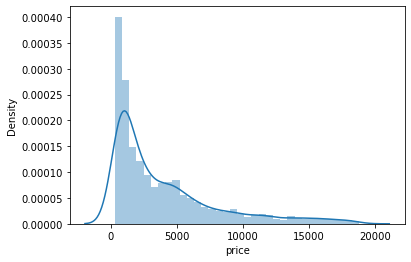

In [8]:
# train_test Split

X = data.drop(['price',"Unnamed: 0","Unnamed: 0.1"], axis=1) # Drop single-value column
y = data['price']


import seaborn as sns    # seaborn is commonly imported as `sns`
import matplotlib.pyplot as plt

sns.distplot(data["price"]) #出圖
plt.show()

In [9]:
# feature selection : SequentialFeatureSelector
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X, y)
sfs_forward = SequentialFeatureSelector(lasso, n_features_to_select=4,
                                        direction='forward').fit(X, y)

feature_names = np.array(X.columns)
print("Features selected by forward sequential selection: "
      f"{feature_names[sfs_forward.get_support()]}")

Features selected by forward sequential selection: ['carat' 'color' 'clarity' 'z']


In [11]:
# 根據特徵選取結果留下四個最重要的特徵，並輸出csv檔
cols = ['carat', 'color', 'clarity', 'z']
output_data = data[cols]
# output_data.shape #(440, 5)

# 輸出CSV檔
output_data.to_csv('Diamonds_cut.csv', encoding = 'utf-8') #預設編碼utf-8